## Homework 03: Discrimination by Regression

### This homework solves discrimination by regression algorithm for multiclass classification

In [1]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from scipy.stats import multivariate_normal
%matplotlib inline

def safelog(x):
    return(np.log(x + 1e-100))   #we define this in order to get rid of -inf, inf of np.log(0). never gives 0

## Question 2

### 3 classes with specified means, covariances and and sizes were generated with labels '1', '2' and '3'. The points were generated with bivariate Gaussian densities and plotted.

In [2]:
#Creating arrays of class means, covariances and sizes. 

means = np.array([[0.0, +2.5],[-2.5, -2.0],[+2.5, -2.0]])

covs = np.array([[[+3.2, +0.0], [+0.0, +1.2]],[[+1.2, +0.8], [+0.8, +1.2]],[[+1.2, -0.8], [-0.8, +1.2]]])

class_sizes = np.array([120,80,100])

In [3]:
#Creating points
points1 = np.random.multivariate_normal(means[0], covs[0], class_sizes[0])
points2 = np.random.multivariate_normal(means[1], covs[1], class_sizes[1])
points3 = np.random.multivariate_normal(means[2], covs[2], class_sizes[2])

points = np.concatenate((points1,points2,points3))

#Creating Class Labels
y = np.concatenate((np.repeat(1, class_sizes[0]),np.repeat(2, class_sizes[1]), np.repeat(3, class_sizes[2])))

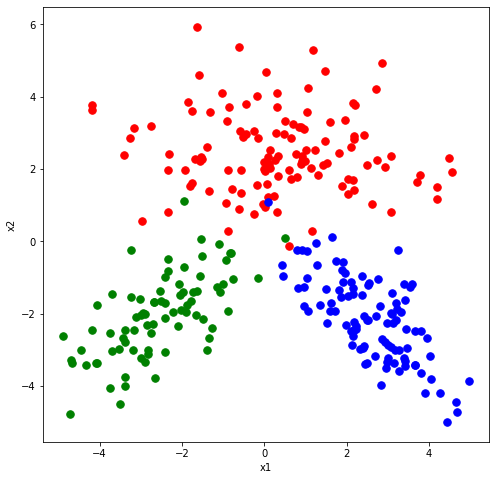

In [4]:
plt.figure(figsize=(8,8))
plt.plot(points1[:,0], points1[:,1], "r.", markersize = 15)
plt.plot(points2[:,0], points2[:,1], "g.", markersize = 15)
plt.plot(points3[:,0], points3[:,1], "b.", markersize = 15)
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()

## Question 3

### Variable K was assigned for number of classes, which in our case is 3.

In [5]:
#set number of classes equal to 3
K = np.max(y)

### In order to compare the predictions with the truth values of y, one-hot-encoding was done which means that matrix of shape 300,3 was created and according to its classes, 1s were placed to the specified column.

In [6]:
#One hot encoding into K columns

y_truth = np.zeros((y.shape[0], K))
for i in range(y.shape[0]):
    if y[i]==1:
        y_truth[i][0]=1
    elif y[i]==2:
        y_truth[i][1]=1
    else:
        y_truth[i][2]=1

### Sigmoid function was defined and applied to every point in data. In the definition, X represents the input, w represents the weight and w0 represents the bias. Sigmoid function was used in order to show the probabilities of the given vector.

In [7]:
#Define sigmoid function

def sigmoid(X, w, w0):
    return(1 / (1 + np.exp(-(np.matmul(X, w) + w0))))

### In order to minimize sum squared error, gradient descent was used in order to determine the best weight and biases. Gradient descent was calculated as follows: 
![title](gradient_func.png)

In [8]:
# define the gradient functions
def gradient_w(X, y_truth, y_predicted):
    return(np.asarray([-np.sum(((y_truth[:,c] - y_predicted[:,c])*y_predicted[:,c]*(1-y_predicted[:,c]))[:,np.newaxis] * points, axis = 0) for c in range(K)]).T)

def gradient_w0(y_truth, y_predicted):
    return(-np.sum((y_truth - y_predicted)*y_predicted*(1-y_predicted),axis=0))

### Learning parameters were set and w and w0 were initialized.

In [9]:
# set learning parameters
eta = 0.01 #Step size
epsilon = 0.001 #stopping condition. If change is smaller than epsilon, I will stop. 

In [10]:
# randomly initalize w and w0
w = np.random.uniform(low = -0.01, high = 0.01, size = (points.shape[1],K))
w0 = np.random.uniform(low = -0.01, high = 0.01, size = (1,K))

In [11]:
print(w)
print(w0)

[[ 0.00665846  0.00541099 -0.00796959]
 [-0.00975683 -0.00820939 -0.00486732]]
[[-0.00635789  0.00642106 -0.00542823]]


### Sum squared errors was used as an error function and gradient descent of w and w0 was used in order to minimize the function. Aim is to minimize w and w0 for Δw0 and Δw. Δw0 and Δw converge to zero while sum squared error is decreasing. Thus, values of w and w0 are being updated at every iteration and when sum squared errors become less than the stopping condition, the iteration stops.

In [12]:
# learn w and w0 using gradient descent
iteration = 1
objective_values = [] #error values
while 1:
    y_predicted = sigmoid(points, w, w0)

    objective_values = np.append(objective_values,np.sum((0.5*(y_truth-y_predicted))**2))

    w_old = w
    w0_old = w0

    w = w - eta * gradient_w(points, y_truth, y_predicted)
    w0 = w0 - eta * gradient_w0(y_truth, y_predicted)
    
    #Eucladian distance
    if np.sqrt(np.sum((w0 - w0_old))**2 + np.sum((w - w_old)**2)) < epsilon:
        break

    iteration = iteration + 1

In [13]:
print(w)
print(w0)

[[-0.03205346 -3.63909739  1.72355868]
 [ 4.43645945 -3.39300258 -2.0209297 ]]
[[-1.08247272 -3.86137143 -3.53463512]]


## Question 4

### Iteration vs error plotted. As it can be seen there had been 2000+ iterations.

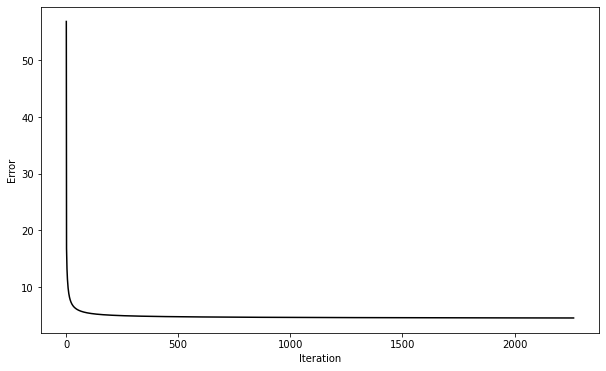

In [14]:
# plot objective function during iterations
plt.figure(figsize = (10, 6))
plt.plot(range(1, iteration + 1), objective_values, "k-")
plt.xlabel("Iteration")
plt.ylabel("Error")
plt.show()

## Question 5

### Argmax function was used in order to determine the classes and according to its result, confusion matrix was created. There are 5 misclassified data points out of 300 data points. Thus, there exists 98% accuracy.

In [15]:
#Assigning each row of dataset its prediction class with argmax function 

y_train_predicted = np.argmax(y_predicted, axis = 1) + 1
y_truth_classes = np.argmax(y_truth, axis = 1) + 1

In [16]:
#Creating confusion matrix

confusion_matrix = pd.crosstab(y_train_predicted, y_truth_classes, rownames = ['y_pred'], colnames = ['y_truth'])
print(confusion_matrix)

y_truth    1   2   3
y_pred              
1        119   2   2
2          1  78   0
3          0   0  98


## Question 6

### Since we need linear line, the discriminant equation is linear. Thus, decision boundary was drawn by discriminant values and misclassified data points were marked at the graph.

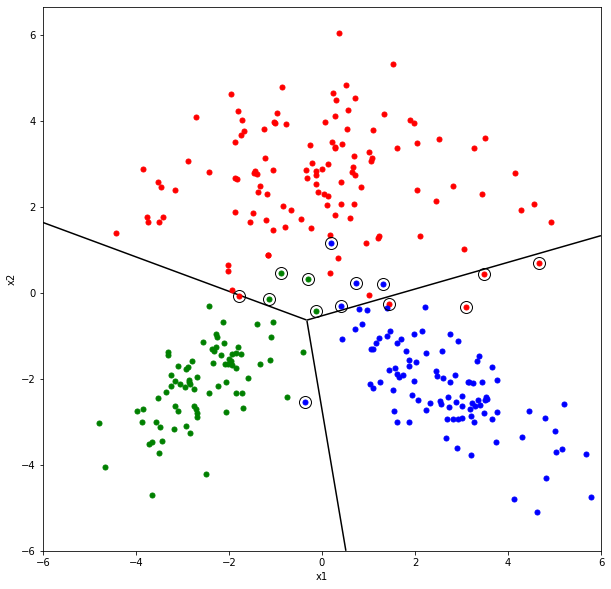

In [17]:
# evaluate discriminant function on a grid
x1_interval = np.linspace(-6, +6, 1201)
x2_interval = np.linspace(-6, +6, 1201)
x1_grid, x2_grid = np.meshgrid(x1_interval, x2_interval)
discriminant_values = np.zeros((len(x1_interval), len(x2_interval), K))
for c in range(K):
    discriminant_values[:,:,c] = w[0, c] * x1_grid + w[1, c] * x2_grid + w0[0, c]
    
A = discriminant_values[:,:,0]
B = discriminant_values[:,:,1]
C = discriminant_values[:,:,2]
A[(A < B) & (A < C)] = np.nan
B[(B < A) & (B < C)] = np.nan
C[(C < A) & (C < B)] = np.nan
discriminant_values[:,:,0] = A
discriminant_values[:,:,1] = B
discriminant_values[:,:,2] = C

plt.figure(figsize = (10, 10))
plt.plot(points[y == 1, 0], points[y == 1, 1], "r.", markersize = 10)
plt.plot(points[y == 2, 0], points[y == 2, 1], "g.", markersize = 10)
plt.plot(points[y == 3, 0], points[y == 3, 1], "b.", markersize = 10)
plt.plot(points[y_train_predicted != y, 0], points[y_train_predicted != y, 1], "ko", markersize = 12, fillstyle = "none")
plt.contour(x1_grid, x2_grid, discriminant_values[:,:,0] - discriminant_values[:,:,1], levels = 0, colors = "k")
plt.contour(x1_grid, x2_grid, discriminant_values[:,:,0] - discriminant_values[:,:,2], levels = 0, colors = "k")
plt.contour(x1_grid, x2_grid, discriminant_values[:,:,1] - discriminant_values[:,:,2], levels = 0, colors = "k")
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()